# VISUALIZING THE GENDER GAP ACROSS COLLEGE DEGREES - USA




The Department of Education Statistics (USA) releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.

Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available on his personal website. 

Randal compiled this data set to explore the gender gap in STEM fields, which stands for science, technology, engineering, and mathematics. This gap is reported on often in the news and not everyone agrees that there is a gap.

In this project we'll explore how we can communicate the nuanced narrative of gender gap using effective data visualization.




**1. Visualizing only STEM fields:**




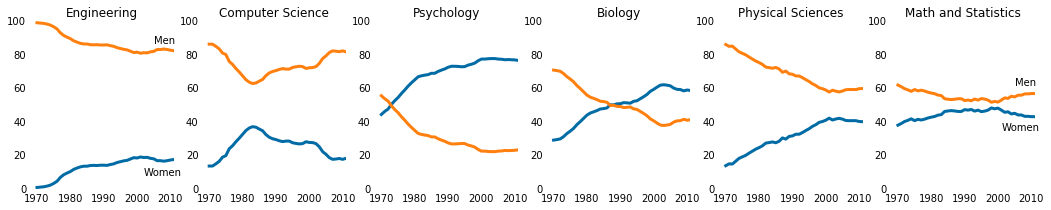

In [5]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3)) # Generate a plot

for sp in range(0,6): # tweaking the chart
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)   
    ax.spines["left"].set_visible(False) #maximize the data-ink ratio 
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2005, 87, 'Men')  # removing  chartjunk
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()

** 2. Comparing across all degree categories **


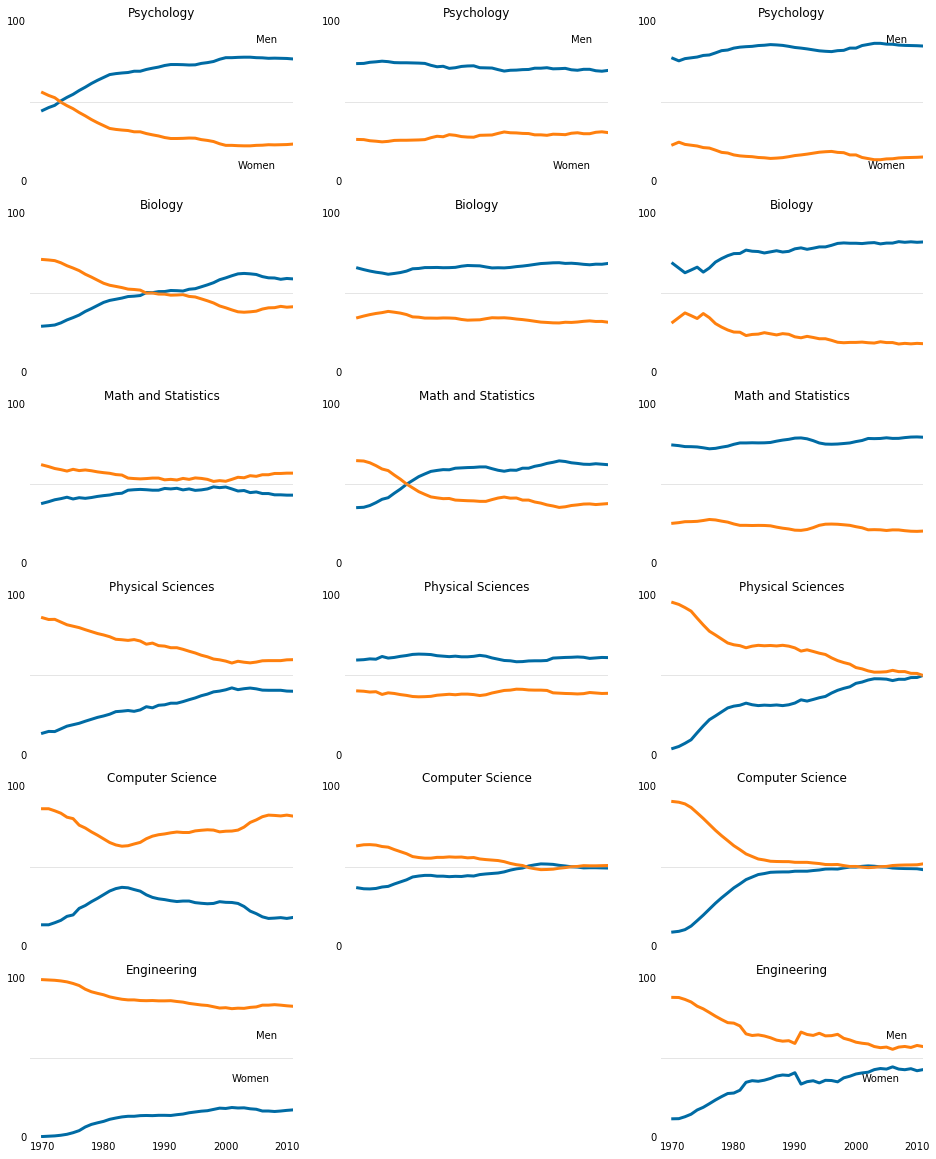

In [24]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']
params = ["bottom", "top", "left", "right"]

fig = plt.figure(figsize=(16, 20))

#Generate a 6 row by 3 column grid of subplots
    
# stem_cats
for sp in range(0,18,3): 
    cat_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)     
    for e in params:
        ax.spines[e].set_visible(False)   
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    
    # keep just the starting and ending labels: 0 - 100
    ax.set_yticks([0,100])
    
    # horizontal line y-axis: 50 - increasing transparency
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
    if cat_index == 0:
        ax.text(2005, 87, 'Men')  
        ax.text(2002, 8, 'Women')
    elif cat_index == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
        ax.tick_params(labelbottom='on') #only the last plot of each column recives the labelbottom  
                
# lib_arts_cats
for sp in range(1,16,3):
    cat_index = int((sp-1)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)    
    for e in params:
        ax.spines[e].set_visible(False)   
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
    if cat_index == 0:
        ax.text(2005, 87, 'Men')  
        ax.text(2002, 8, 'Women')
    elif cat_index == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
        ax.tick_params(labelbottom='on')
        
# other_cats
for sp in range(2,20,3): 
    cat_index = int((sp-2)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    for e in params:
        ax.spines[e].set_visible(False)   
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    
    if cat_index == 0:
        ax.text(2005, 87, 'Men')  
        ax.text(2002, 8, 'Women')
    elif cat_index == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
        ax.tick_params(labelbottom='on')

# export all of the plots contained in the figure as a single image file
fig.savefig("gender_gaps_degree_fig.png")                 

plt.show()
